# Użyte Biblioteki

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import yfinance as yf
import world_bank_data as wb
from scipy.stats import pearsonr

# Analiza Statystyczna Zbioru Danych "California Housing"

## Zbiór Danych
Dane pochodzą ze zbioru California Housing, dostępnego w bibliotece `scikit-learn`. Zbiór ten zawiera informacje o różnych cechach nieruchomości w Kalifornii oraz ich cenach z roku 1990. Szczegółowe informacje o zbiorze danych można znaleźć na stronie [California Housing Data Set](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). W analizie wykorzystano następujące zmienne:

- **MedInc**: Mediana dochodów na gospodarstwo domowe.
- **HouseAge**: Średni wiek domów.
- **AveRooms**: Średnia liczba pokoi w domu.
- **AveOccup**: Średnia liczba osób na gospodarstwo domowe.
- **Latitude**: Szerokość geograficzna.
- **Longitude**: Długość geograficzna.
- **Population**: Liczba osób w jednostce administracyjnej.
- **MedHouseVal**: Mediana wartości nieruchomości.

## Analiza Statystyczna

### Statystyki Opisowe
Obliczono podstawowe statystyki opisowe dla wszystkich zmiennych, takie jak średnia, odchylenie standardowe, minimum i maksimum.

### Korelacja
Obliczono macierz korelacji między zmiennymi, która jest przedstawiona na poniższym wykresie. Macierz korelacji pozwala na ocenę siły i kierunku liniowych zależności między zmiennymi.

## Budowa Modeli Liniowych
### Model 1
Model regresji liniowej wykorzystujący wszystkie dostępne zmienne do przewidywania wartości nieruchomości. Obliczono dla niego:
- **MSE (Średni Błąd Kwadratowy)**: 0.5559
- **\( R^2 \) (Współczynnik Determinacji)**: 0.5758

### Model 2
Model regresji liniowej wykorzystujący tylko wybrane zmienne (MedInc i AveRooms) do przewidywania wartości nieruchomości. Obliczono dla niego:
- **MSE (Średni Błąd Kwadratowy)**: 0.7022
- **\( R^2 \) (Współczynnik Determinacji)**: 0.4642

## Wyniki i Wnioski

### MSE (Średni Błąd Kwadratowy)
- **Model 1**: MSE = 0.5559. Mniejsza wartość MSE oznacza, że model lepiej dopasowuje się do danych i prognozy są bardziej dokładne.
- **Model 2**: MSE = 0.7022. Wyższe MSE wskazuje, że prognozy są mniej dokładne w porównaniu z Modelem 1.

### \( R^2 \) (Współczynnik Determinacji)
- **Model 1**: \( R^2 = 0.5758 \). Wyższe \( R^2 \) oznacza, że model lepiej wyjaśnia wariancję zmiennej zależnej (MedHouseVal).
- **Model 2**: \( R^2 = 0.4642 \). Niższe \( R^2 \) wskazuje na mniejsze wyjaśnienie wariancji zmiennej zależnej przez Model 2.

### Porównanie Modeli
- **Model 1**: Zawiera wszystkie dostępne zmienne, co zapewnia lepsze dopasowanie do danych. Ma niższe MSE i wyższe \( R^2 \), co sugeruje, że jest bardziej precyzyjny i efektywny w prognozowaniu wartości nieruchomości.
- **Model 2**: Mimo mniejszej liczby zmiennych, ma wyższe MSE i niższe \( R^2 \). Oznacza to, że jest mniej skuteczny w przewidywaniu wartości nieruchomości w porównaniu do Modelu 1.
### Wybór Lepszego Modelu
Na podstawie wyników MSE i \( R^2 \), **Model 1** jest lepszym wyborem. Oferuje lepsze dopasowanie do danych i dokładniejsze prognozy wartości nieruchomości.

## Wnioski
- **Model 1**: Lepszy w prognozowaniu wartości nieruchomości, ponieważ wykorzystuje wszystkie dostępne zmienne i osiąga lepsze wyniki w zakresie MSE i \( R^2 \).
- **Model 2**: Prostszy, jest mniej skuteczny w przewidywaniu wartości nieruchomości. Ma wyższe MSE i niższe \( R^2 \), co wskazuje na gorsze dopasowanie.
- **Zalecenia**: W sytuacjach, gdzie dokładność prognoz jest kluczowa, Model 1 powinien być preferowany ze względu na lepsze wyniki MSE i \( R^2 \).
- **Zależności Między Zmiennymi**: Heatmapa korelacji ujawnia silną dodatnią zależność między `MedHouseVal` a `MedInc`, co wskazuje, że wyższe dochody są związane z wyższą wartością nieruchomości.

Statystyki opisowe:
               liczba      średnia     odch.std         min         25%  \
MedInc       20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge     20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms     20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
Population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup     20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseVal  20640.0     2.068558     1.153956    0.149990    1.196000   

                 mediana          75%           max  
MedInc          3.534800     4.743250     15.000100  
HouseAge       29.000000    37.000000     52.000000  
AveRooms        5.229129     6.052381    141.909091  
AveBedrms       1.0487

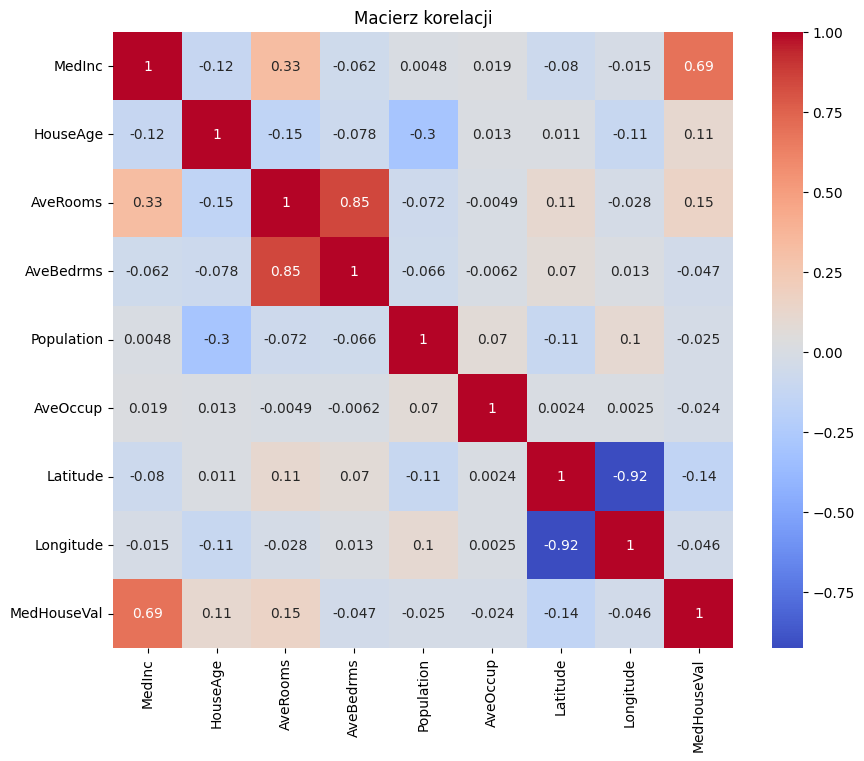

Pierwszy model - MSE: 0.555891598695244 , R^2: 0.5757877060324511
Drugi model - MSE: 0.7021550469058006 , R^2: 0.4641710652437856
Lepszy model to model pierwszy.


In [182]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Załadowanie zbioru danych California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Statystyki opisowe w języku polskim
desc_stats = df.describe().T
desc_stats.rename(columns={
    'count': 'liczba',
    'mean': 'średnia',
    'std': 'odch.std',
    'min': 'min',
    '25%': '25%',
    '50%': 'mediana',
    '75%': '75%',
    'max': 'max'
}, inplace=True)
print("Statystyki opisowe:\n", desc_stats)

# Macierz korelacji
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz korelacji')
plt.show()

# Podział danych na zestaw treningowy i testowy
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Budowa pierwszego modelu liniowego (wszystkie zmienne)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# Budowa drugiego modelu liniowego (wybrane zmienne)
X_train2 = X_train[['MedInc', 'AveRooms']]
X_test2 = X_test[['MedInc', 'AveRooms']]
model2 = LinearRegression()
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

# Wyniki modeli
print("Pierwszy model - MSE:", mse1, ", R^2:", r2_1)
print("Drugi model - MSE:", mse2, ", R^2:", r2_2)

# Wybór lepszego modelu
if r2_1 > r2_2:
    print("Lepszy model to model pierwszy.")
else:
    print("Lepszy model to model drugi.")


#  Analiza Wpływu Kryzysu Finansowego na Wykresy Stóp Zwrotu i Wolumenów Transakcyjnych

## Zbiór Danych
Dane dla dwóch spółek, JPMorgan Chase (JPM) i Goldman Sachs (GS), zostały pobrane z serwisu [Yahoo Finance](https://finance.yahoo.com/) przy użyciu biblioteki `yfinance`. Analizowane dane obejmują okres bezpośrednio przed oraz po upadku Lehman Brothers, który miał miejsce 15 września 2008 roku.

### Analiza Statystyczna
W celu wizualizacji wpływu kryzysu na zachowanie aktywów, stworzone zostały wykresy przedstawiające:
- **Dzienną Stopę Zwrotu dla JPMorgan Chase (JPM)**
- **Dzienną Stopę Zwrotu dla Goldman Sachs (GS)**
- **Wolumen Transakcyjny dla JPMorgan Chase (JPM)**
- **Wolumen Transakcyjny dla Goldman Sachs (GS)**

### Wnioski
- **Przed Upadkiem Lehman Brothers:** Stopy zwrotu obu spółek (JPM i GS) oraz wolumen transakcyjny były stosunkowo stabilne. Zauważalne były jednak pierwsze oznaki zwiększonej zmienności, szczególnie w przypadku JPMorgan Chase.
- **Bezpośrednio Po Upadku Lehman Brothers:** W tym okresie obserwujemy znaczny wzrost wolumenu transakcyjnego oraz spadek stopy zwrotu dla obu spółek. To może sugerować, że inwestorzy zaczęli panicznie wyprzedawać akcje, co spowodowało wzrost wolumenu oraz gwałtowne zmiany cen.
- **Kolejne Dni** W kolejnych dniach po kryzysie widoczna jest duża niestabilność na rynku, charakteryzująca się gwałtownymi spadkami i wzrostami zarówno stóp zwrotu, jak i wolumenu.

### Interpretacja Ekonomiczna
- **Wzrost Wolumenu:** Wzrost wolumenu transakcyjnego może być związany z paniczną wyprzedażą akcji przez inwestorów, którzy próbują uchronić się przed dalszymi stratami. Takie zachowanie prowadzi do nagłego wzrostu liczby transakcji na rynku, ponieważ inwestorzy podejmują decyzje o sprzedaży akcji w dużych ilościach, co generuje znaczne obroty i może przyczyniać się do większej zmienności cen.
- **Spadek Stopy Zwrotu:** Reakcja rynku na upadek Lehman Brothers prowadziła do spadku cen akcji, co jest odzwierciedlone w obniżeniu stopy zwrotu. Obie badane spółki, JPMorgan Chase i Goldman Sachs, należą do sektora bankowego, który został szczególnie dotknięty kryzysem finansowym.
- **Niestabilność Po Kryzysie:** Wysoka zmienność w kolejnych dniach po upadku wskazuje na niepewność rynkową i dalsze reakcje inwestorów na skutki kryzysu finansowego.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


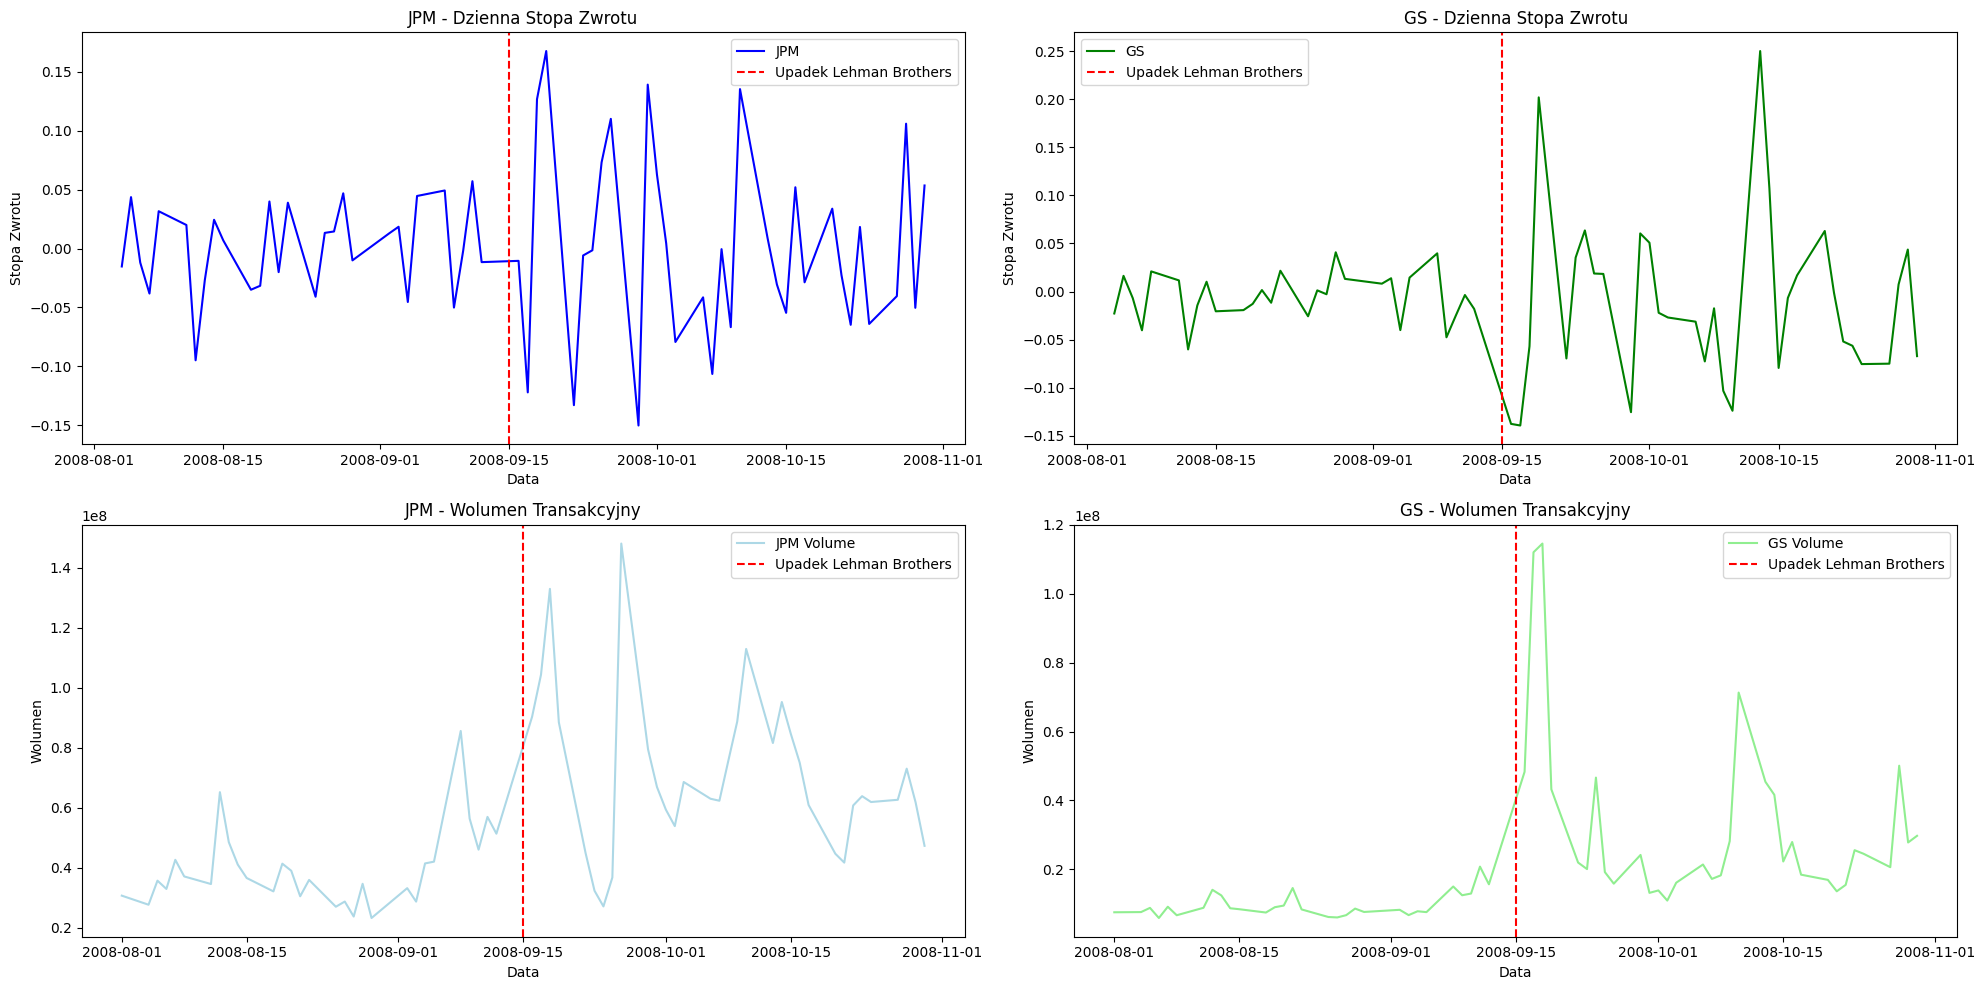

In [196]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Ustalenie zakresu czasowego przed i po upadku Lehman Brothers
start_date_before = '2008-08-01'
end_date_before = '2008-09-15'
start_date_after = '2008-09-16'
end_date_after = '2008-10-31'

# Pobranie danych dla spółek JPMorgan Chase i Goldman Sachs
jpm_data_before = yf.download('JPM', start=start_date_before, end=end_date_before)
jpm_data_after = yf.download('JPM', start=start_date_after, end=end_date_after)

gs_data_before = yf.download('GS', start=start_date_before, end=end_date_before)
gs_data_after = yf.download('GS', start=start_date_after, end=end_date_after)

# Konwersja indeksu na datetime
jpm_data_before.index = pd.to_datetime(jpm_data_before.index)
jpm_data_after.index = pd.to_datetime(jpm_data_after.index)
gs_data_before.index = pd.to_datetime(gs_data_before.index)
gs_data_after.index = pd.to_datetime(gs_data_after.index)

# Łączenie danych przed i po
jpm_data_combined = pd.concat([jpm_data_before, jpm_data_after])
gs_data_combined = pd.concat([gs_data_before, gs_data_after])

# Obliczanie dziennych prostych stóp zwrotu
jpm_data_combined['Daily Return'] = jpm_data_combined['Close'].pct_change()
gs_data_combined['Daily Return'] = gs_data_combined['Close'].pct_change()

# Tworzenie wykresu z czterema subplotami
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Wykresy stóp zwrotu
axs[0, 0].plot(jpm_data_combined.index, jpm_data_combined['Daily Return'], label='JPM', color='blue')
axs[0, 0].set_title('JPM - Dzienna Stopa Zwrotu')
axs[0, 0].set_xlabel('Data')
axs[0, 0].set_ylabel('Stopa Zwrotu')
axs[0, 0].axvline(pd.to_datetime('2008-09-15'), color='red', linestyle='--', label='Upadek Lehman Brothers')
axs[0, 0].legend()

axs[0, 1].plot(gs_data_combined.index, gs_data_combined['Daily Return'], label='GS', color='green')
axs[0, 1].set_title('GS - Dzienna Stopa Zwrotu')
axs[0, 1].set_xlabel('Data')
axs[0, 1].set_ylabel('Stopa Zwrotu')
axs[0, 1].axvline(pd.to_datetime('2008-09-15'), color='red', linestyle='--', label='Upadek Lehman Brothers')
axs[0, 1].legend()

# Wykresy wolumenu
axs[1, 0].plot(jpm_data_combined.index, jpm_data_combined['Volume'], label='JPM Volume', color='lightblue')
axs[1, 0].set_title('JPM - Wolumen Transakcyjny')
axs[1, 0].set_xlabel('Data')
axs[1, 0].set_ylabel('Wolumen')
axs[1, 0].axvline(pd.to_datetime('2008-09-15'), color='red', linestyle='--', label='Upadek Lehman Brothers')
axs[1, 0].legend()

axs[1, 1].plot(gs_data_combined.index, gs_data_combined['Volume'], label='GS Volume', color='lightgreen')
axs[1, 1].set_title('GS - Wolumen Transakcyjny')
axs[1, 1].set_xlabel('Data')
axs[1, 1].set_ylabel('Wolumen')
axs[1, 1].axvline(pd.to_datetime('2008-09-15'), color='red', linestyle='--', label='Upadek Lehman Brothers')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

#  Analiza Zastosowania Prawa Okuna na Przykładzie Wybranych Krajów

## Zbiór Danych

Dane z okresu 2005-2023 zostały pobrane z zasobów Banku Światowego i są dostępne pod poniższymi linkami:
- [Wzrost PKB (NY.GDP.MKTP.KD.ZG)](https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG)
- [Stopa Bezrobocia (SL.UEM.TOTL.ZS)](https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS)

### Analiza Statystyczna
- **Korelacja Pearsona**: Obliczono współczynnik korelacji Pearsona między rocznym wzrostem PKB a stopą bezrobocia dla każdego kraju. Korelacja ta mierzy liniowy związek między zmiennymi, wskazując, w jakim stopniu zmiany w wzroście PKB są powiązane ze zmianami w stopie bezrobocia. Wyniki korelacji mogą się różnić w zależności od kraju i przyjmować wartości od -1 do 1. Wartości bliskie -1 sugerują silną negatywną korelację, co jest zgodne z Prawem Okuna — oznacza to, że wzrost PKB jest mocno powiązany ze spadkiem stopy bezrobocia. Wartości bliskie 1 wskazują na silną pozytywną korelację, co oznacza, że wzrost PKB jest związany ze wzrostem stopy bezrobocia, co jest przeciwne do przewidywań Prawa Okuna. Wartości bliskie 0 oznaczają brak wyraźnego związku między wzrostem PKB a stopą bezrobocia. Analiza tych wyników pozwala na ocenę, w jakim stopniu Prawo Okuna jest realizowane w różnych krajach.
- **Wykres Rozrzutu**: Na wykresie rozrzutu pokazujemy, jak wzrost PKB jest związany ze stopą bezrobocia w różnych krajach. Każdy punkt na wykresie reprezentuje korelację Pearsona obliczoną dla danego kraju. Dzięki temu możemy wizualnie ocenić, jak zmienia się związek między tymi dwoma zmiennymi w zależności od kraju.
- **Analiza Krajów**:
  - **Kraje z Silną Ujemną Korelacją**: Do tej grupy zaliczają się kraje, dla których zaobserwowano silną ujemną korelację między wzrostem PKB a stopą bezrobocia. Oznacza to, że wzrost PKB jest mocno związany ze spadkiem stopy bezrobocia, co sugeruje, że Prawo Okuna jest dobrze realizowane w tych krajach.
  - **Kraje z Słabą Ujemną Korelacją**: Kraje, dla których korelacja jest słaba. W tych krajach wzrost PKB jest związany ze spadkiem stopy bezrobocia, ale w mniejszym stopniu niż w krajach z silną korelacją.
  - **Kraje z Brakiem Istotnej Korelacji**: Do tej grupy zaliczają się kraje, gdzie korelacja między wzrostem PKB a stopą bezrobocia jest bliska zeru lub dodatnia. Oznacza to, że wzrost PKB nie jest wyraźnie związany z obniżeniem stopy bezrobocia, co sugeruje brak realizacji Prawa Okuna w tych krajach.

### Wnioski
- **Kraje z Silną Ujemną Korelacją**:
  - W krajach z silną ujemną korelacją między wzrostem PKB a stopą bezrobocia (średnia korelacja: -0.71) Prawo Okuna jest wyraźnie realizowane. Przykłady krajów: Afghanistan, Angola, Australia, China, Colombia. Wzrost PKB w tych krajach skutkuje znacznym spadkiem stopy bezrobocia, co potwierdza teorię Prawa Okuna.
- **Kraje z Słabą Ujemną Korelacją**:
  - Kraje z słabą ujemną korelacją (średnia korelacja: -0.50) również wykazują związek między wzrostem PKB a spadkiem stopy bezrobocia, ale w mniejszym stopniu. Przykłady: Bangladesh, United States. Prawo Okuna jest realizowane, ale wpływ wzrostu PKB na bezrobocie jest mniej wyraźny.
- **Kraje z Brakiem Istotnej Korelacji**:
  - W krajach, gdzie nie zaobserwowano istotnej korelacji (średnia korelacja: -0.11) Prawo Okuna nie znajduje zastosowania. Wzrost PKB nie jest skutecznie powiązany ze spadkiem stopy bezrobocia. Przykłady: Albania, Algeria, Argentina, Austria, Belgium. Może to wskazywać na inne czynniki wpływające na rynek pracy.
- **Znaczenie P-value**:
  - Niskie p-wartości (poniżej 0.05) sugerują statystyczną istotność korelacji. Kraje z istotnymi p-wartościami (zarówno silnymi, jak i słabymi korelacjami) potwierdzają, że wyniki są mało prawdopodobne, aby były wynikiem przypadku. Kraje z wysokimi p-wartościami mogą mieć przypadkowe lub zakłócone korelacje.
- **Różnice Międzynarodowe**:
  - Istnieją znaczące różnice między krajami w zakresie realizacji Prawa Okuna. Różnice te mogą wynikać z krajowych uwarunkowań gospodarczych, polityk rynkowych oraz struktury rynku pracy. W krajach z silną korelacją Prawo Okuna działa zgodnie z oczekiwaniami, podczas gdy w krajach bez istotnej korelacji mogą występować dodatkowe czynniki wpływające na niezbieżność teorii z danymi empirycznymi.

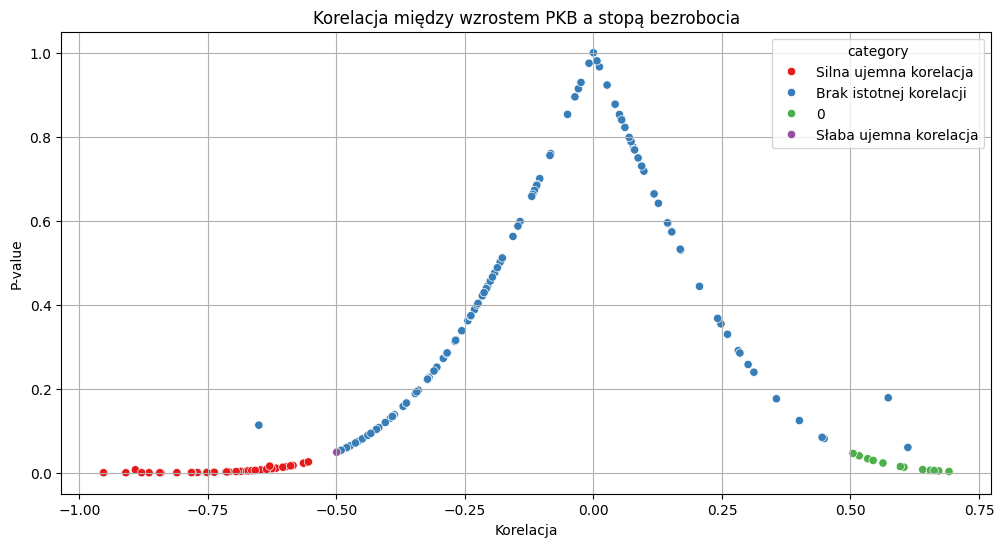


Kraje z Silna ujemna korelacja:
['Afghanistan', 'Angola', 'Australia', 'Bahrain', 'Bolivia', 'Canada', 'China', 'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica', 'Djibouti', 'Ecuador', 'Egypt, Arab Rep.', 'Ethiopia', 'Honduras', 'Iceland', 'Iraq', 'Lebanon', 'Lesotho', 'Liberia', 'Malawi', 'Malaysia', 'Mali', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Nigeria', 'Panama', 'Peru', 'Somalia', 'South Africa', 'Syrian Arab Republic', 'Timor-Leste', 'Togo', 'Tunisia', 'Turkiye', 'Ukraine', 'Yemen, Rep.']
Liczba krajów: 40
Średnia korelacja dla Silna ujemna korelacja: -0.71

Kraje z Słaba ujemna korelacja:
['Bangladesh', 'United States']
Liczba krajów: 2
Średnia korelacja dla Słaba ujemna korelacja: -0.50

Kraje z Brak istotnej korelacji:
['Albania', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Bahamas, The', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cam

In [240]:
import pandas as pd
import world_bank_data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

# Lista rzeczywistych krajów
countries_only = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria", 
    "Azerbaijan", "Bahamas, The", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", 
    "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", 
    "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chile", "China", "Colombia", "Comoros", "Congo, Dem. Rep.", 
    "Congo, Rep.", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "Denmark", "Djibouti", "Dominica", 
    "Dominican Republic", "Ecuador", "Egypt, Arab Rep.", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", 
    "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia, The", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", 
    "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran, Islamic Rep.", 
    "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, Dem. People’s Rep.", 
    "Korea, Rep.", "Kosovo", "Kuwait", "Kyrgyz Republic", "Lao PDR", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", 
    "Liechtenstein", "Lithuania", "Luxembourg", "Macao SAR, China", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", 
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia, Fed. Sts.", "Moldova", "Monaco", "Mongolia", 
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", 
    "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", 
    "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russian Federation", "Rwanda", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", 
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovak Republic", "Slovenia", "Solomon Islands", "Somalia", "South Africa", 
    "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syrian Arab Republic", "Tajikistan", 
    "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkiye", "Turkmenistan", "Tuvalu", 
    "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Venezuela, RB", 
    "Vietnam", "Yemen, Rep.", "Zambia", "Zimbabwe"
]

# Pobieramy dane dla wszystkich dostępnych krajów
gdp_growth = wb.get_series('NY.GDP.MKTP.KD.ZG', date='2005:2020')
unemployment_rate = wb.get_series('SL.UEM.TOTL.ZS', date='2005:2020')

# Jeśli mamy wielopoziomowy indeks, zresetujmy go i dostosujmy nazwy kolumn
gdp_df = gdp_growth.reset_index()
gdp_df.columns = ['Country', 'Series', 'Year', 'GDP_growth']

unemployment_df = unemployment_rate.reset_index()
unemployment_df.columns = ['Country', 'Series', 'Year', 'Unemployment_rate']

# Łączymy dane w jeden DataFrame
data_df = pd.merge(gdp_df[['Country', 'Year', 'GDP_growth']], 
                   unemployment_df[['Country', 'Year', 'Unemployment_rate']], 
                   on=['Country', 'Year'])

# Filtrujemy dane tylko dla rzeczywistych krajów
data_df = data_df[data_df['Country'].isin(countries_only)]

# Funkcja do obliczania korelacji z p-value
def calculate_correlation(data):
    # Usuwamy wiersze z NaN lub inf
    data = data.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Sprawdzamy, czy mamy wystarczającą liczbę danych
    if len(data) < 2:
        return pd.Series({'correlation': np.nan, 'p_value': np.nan})
    
    corr, p_value = pearsonr(data['GDP_growth'], data['Unemployment_rate'])
    return pd.Series({'correlation': corr, 'p_value': p_value})

# Obliczamy korelację i p-value dla każdego kraju
correlations = data_df.groupby('Country').apply(calculate_correlation)

# Dodajemy kolumnę do kategorii
conditions = [
    (correlations['correlation'] < -0.5) & (correlations['p_value'] < 0.05),
    (correlations['correlation'] >= -0.5) & (correlations['correlation'] < 0) & (correlations['p_value'] < 0.05),
    (correlations['p_value'] >= 0.05)
]
choices = ['Silna ujemna korelacja', 'Słaba ujemna korelacja', 'Brak istotnej korelacji']
correlations['category'] = np.select(conditions, choices)

# Obliczamy średnią korelację dla wszystkich krajów
average_correlation_all = correlations['correlation'].mean()

# Wizualizacja danych
plt.figure(figsize=(12, 6))
sns.scatterplot(x='correlation', y='p_value', hue='category', data=correlations, palette='Set1')
plt.title('Korelacja między wzrostem PKB a stopą bezrobocia')
plt.xlabel('Korelacja')
plt.ylabel('P-value')
plt.grid(True)
plt.show()

for category in choices:
    countries_in_category = correlations[correlations['category'] == category]
    num_countries = len(countries_in_category)
    avg_correlation = countries_in_category['correlation'].mean()
    
    print(f"\nKraje z {category}:")
    print(countries_in_category.index.tolist())
    print(f"Liczba krajów: {num_countries}")
    print(f"Średnia korelacja dla {category}: {avg_correlation:.2f}")

# Wyświetlanie średniej korelacji dla wszystkich krajów
print(f"\nŚrednia korelacja dla wszystkich krajów: {average_correlation_all:.2f}")


#  Analiza Nierówności Dochodowych: Krzywa Lorenza i Współczynnik Giniego

## Zbiór Danych

- **Dane Globalne:**
  - Wskaźnik Giniego dla różnych krajów, pobrany z bazy danych Banku Światowego. Dane obejmują lata od 2014 do 2024. Szczegóły dostępne są pod tym [linkiem](https://data.worldbank.org/indicator/SI.POV.GINI).
- **Dane z Polski:**
  - Struktura wynagrodzeń w Polsce za październik 2022 roku, opublikowana przez Główny Urząd Statystyczny. Szczegóły dotyczące struktury wynagrodzeń można znaleźć pod tym [linkiem](https://stat.gov.pl/obszary-tematyczne/rynek-pracy/pracujacy-zatrudnieni-wynagrodzenia-koszty-pracy/struktura-wynagrodzen-wedlug-zawodow-za-pazdziernik-2022-roku,4,11.html).

### Analiza Statystyczna

**Obliczanie Krzywej Lorenza:**
Krzywa Lorenza jest tworzona poprzez sortowanie danych oraz obliczanie skumulowanych udziałów populacji i dochodów. Funkcja `calculate_lorenz_curve` oblicza te skumulowane udziały, które następnie pozwalają nam zobrazować rozkład dochodów lub bogactwa w danej populacji. 
Współczynnik Giniego, miara nierówności, jest obliczany jako obszar między krzywą Lorenza a linią równości (gdzie wszystkie jednostki mają równe dochody). W celu oszacowania krzywej Lorenza, przyjęto, że najniższy przedział dochodowy zaczyna się od 0, a najwyższy kończy na 30 000 PLN. Dzięki temu możliwe było obliczenie średniej wartości dochodu w poszczególnych przedziałach. 
- **Wykres 1:** Krzywa Lorenza dla danych przykładowych wektorów (można modyfikować wektory przy zachowaniu odpowiedniej struktury).
- **Wykres 2:** Krzywa Lorenza dla wynagrodzeń w Polsce w październiku 2022 roku. Porównuje nierówności dochodowe na podstawie rzeczywistych danych o wynagrodzeniach w Polsce.
- **Wykres 3:** Box-plot przedstawiający rozkład dostępnych wartości wskaźnika Giniego dla poszczególnych krajów. Umożliwia porównanie wartości mediany i średniej wskaźnika Giniego oraz zestawienie ich z wskaźnikiem dla Polski.

### Wnioski
Analiza pokazuje, że Polska, z wskaźnikiem Giniego wynoszącym około 30,31, znajduje się poniżej globalnej średniej (36,49) i mediany (35). Wskazuje to na niższy poziom nierówności dochodowych w porównaniu do większości krajów.


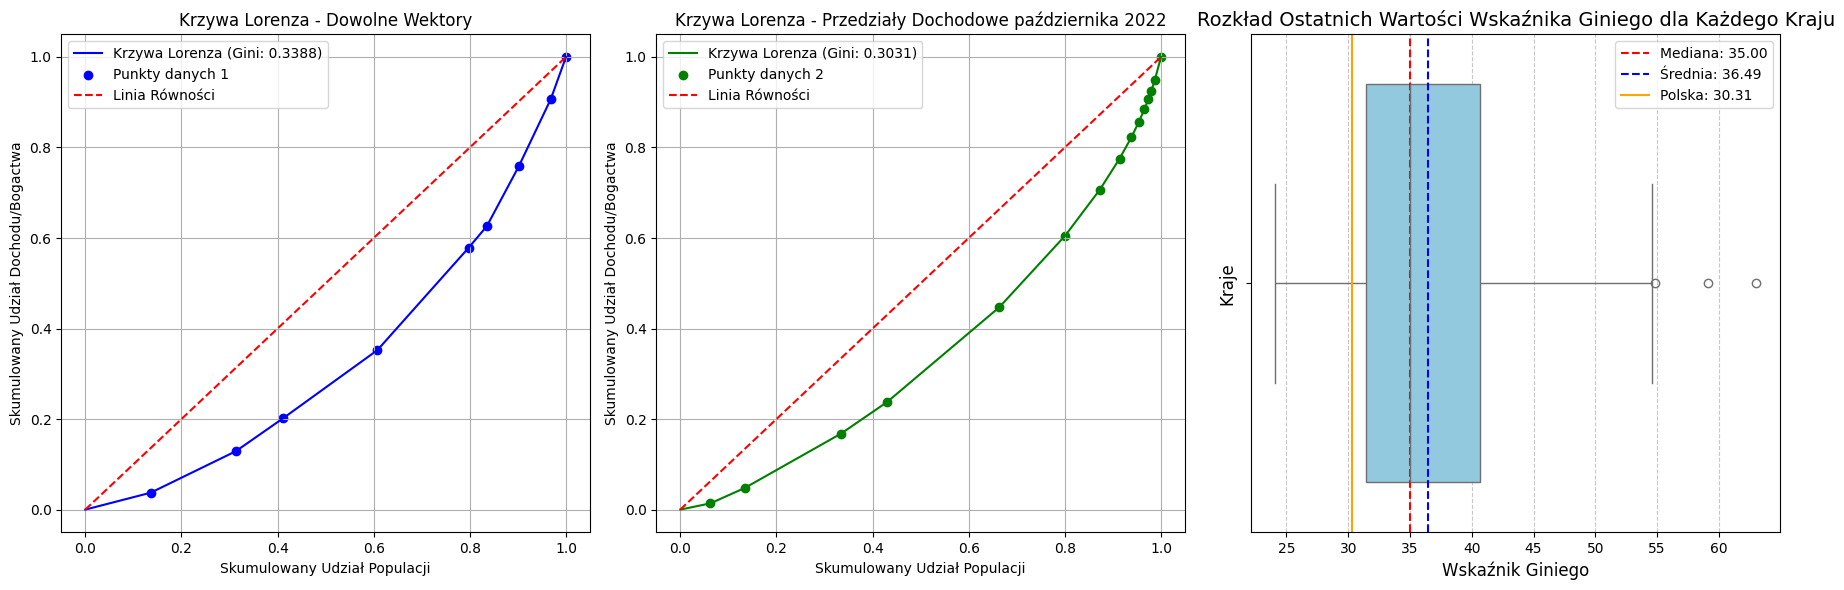

In [241]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import world_bank_data as wb

# Pobierz dane wskaźnika Giniego dla wszystkich krajów na lata 2014-2024
gini_data = wb.get_series('SI.POV.GINI', date='2014:2024')

# Przekształć wielowymiarowy obiekt Series na DataFrame
gini_df = gini_data.reset_index()

# Zmień nazwy kolumn dla większej przejrzystości
gini_df.columns = ['Kraj', 'Seria', 'Rok', 'Wskaźnik Giniego']

# Usuń wiersze, gdzie wskaźnik Giniego jest NaN
gini_df.dropna(subset=['Wskaźnik Giniego'], inplace=True)

# Posortuj DataFrame według kraju i roku
gini_df.sort_values(by=['Kraj', 'Rok'], inplace=True)

# Grupuj według kraju i weź ostatni niepusty wpis
last_gini_df = gini_df.groupby('Kraj').tail(1)

def calculate_lorenz_curve(x, y):
    sorted_indices = np.argsort(x)
    x_sorted = np.array(x)[sorted_indices]
    y_sorted = np.array(y)[sorted_indices]
    
    cum_population = np.cumsum(y_sorted) / sum(y_sorted)
    cum_income = np.cumsum(x_sorted * y_sorted) / sum(x_sorted * y_sorted)
    
    cum_population = np.insert(cum_population, 0, 0)
    cum_income = np.insert(cum_income, 0, 0)
    
    return cum_population, cum_income

def calculate_gini(x, y):
    cum_population, cum_income = calculate_lorenz_curve(x, y)
    area_under_lorenz = np.trapz(cum_income, cum_population)
    gini_index = 1 - 2 * area_under_lorenz
    return gini_index

def plot_lorenz_curves(x1, y1, x2, y2):
    cum_population1, cum_income1 = calculate_lorenz_curve(x1, y1)
    cum_population2, cum_income2 = calculate_lorenz_curve(x2, y2)
    
    gini1 = calculate_gini(x1, y1)
    gini2 = calculate_gini(x2, y2)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Pierwsza Krzywa Lorenza
    axs[0].plot(cum_population1, cum_income1, label=f'Krzywa Lorenza (Gini: {gini1:.4f})', color='blue')
    axs[0].scatter(np.cumsum(np.array(y1) / sum(y1)), np.cumsum(np.array(x1) * np.array(y1) / sum(np.array(x1) * np.array(y1))), color='blue', marker='o', label='Punkty danych 1')
    axs[0].plot([0, 1], [0, 1], label='Linia Równości', color='red', linestyle='--')
    axs[0].set_title('Krzywa Lorenza - Dowolne Wektory')
    axs[0].set_xlabel('Skumulowany Udział Populacji')
    axs[0].set_ylabel('Skumulowany Udział Dochodu/Bogactwa')
    axs[0].legend()
    axs[0].grid(True)
    
    # Druga Krzywa Lorenza
    axs[1].plot(cum_population2, cum_income2, label=f'Krzywa Lorenza (Gini: {gini2:.4f})', color='green')
    axs[1].scatter(np.cumsum(np.array(y2) / sum(y2)), np.cumsum(np.array(x2) * np.array(y2) / sum(np.array(x2) * np.array(y2))), color='green', marker='o', label='Punkty danych 2')
    axs[1].plot([0, 1], [0, 1], label='Linia Równości', color='red', linestyle='--')
    axs[1].set_title('Krzywa Lorenza - Przedziały Dochodowe październik 2022')
    axs[1].set_xlabel('Skumulowany Udział Populacji')
    axs[1].set_ylabel('Skumulowany Udział Dochodu/Bogactwa')
    axs[1].legend()
    axs[1].grid(True)
    
    # Trzeci Wykres: Wykres Box-Plot dla wskaźnika Giniego
    sns.boxplot(x='Wskaźnik Giniego', data=last_gini_df, color='skyblue', ax=axs[2])
    
    # Dodaj tytuł i etykiety
    axs[2].set_title('Rozkład Wartości Wskaźnika Giniego dla Każdego Kraju', fontsize=14)
    axs[2].set_xlabel('Wskaźnik Giniego', fontsize=12)
    axs[2].set_ylabel('Kraje', fontsize=12)
    
    # Dostosuj etykiety osi x
    axs[2].tick_params(axis='x', labelsize=10)
    axs[2].tick_params(axis='y', labelsize=10)
    
    # Dodaj siatkę
    axs[2].grid(axis='x', linestyle='--', alpha=0.7)
    
    # Oblicz statystyki
    median_value = last_gini_df['Wskaźnik Giniego'].median()
    mean_value = last_gini_df['Wskaźnik Giniego'].mean()
    
    # Dodaj linie dla mediany i średniej
    axs[2].axvline(median_value, color='red', linestyle='--', label=f'Mediana: {median_value:.2f}')
    axs[2].axvline(mean_value, color='blue', linestyle='--', label=f'Średnia: {mean_value:.2f}')
    
    # Dodaj legendę
    axs[2].legend()

    # Dodaj linię wskaźnika Giniego dla Polski
    axs[2].axvline(gini2 * 100, color='orange', linestyle='-', label=f'Polska: {gini2 * 100:.2f}')

    # Dodaj legendę 
    axs[2].legend(loc='best')
    
    # Dostosuj układ
    plt.tight_layout()
    plt.show()

# Przedziały dochodowe październik 2022
ranges1 = [
    (0, 3010), (3010.01, 3500.64), (3500.65, 4690.86), (4690.87, 5250.96), 
    (5250.97, 7001.28), (7001.29, 8751.60), (8751.61, 10501.92), 
    (10501.93, 12252.24), (12252.25, 14002.56), (14002.57, 15752.88), 
    (15752.89, 17503.20), (17503.21, 19253.52), (19253.53, 21003.84), 
    (21003.85, 24504.48), (24504.49, 30000)  
]
counts1 = [539.2, 616.6, 1715.7, 822.2, 2002.4, 1176.7, 622.4, 350.3, 210.3, 138.1, 97.3, 69.9, 50.9, 65.9, 108.3]

x_values1 = [(low + high) / 2 for (low, high) in ranges1]

# Przykładowe dane do porównania
x_values2 = [123, 232, 332, 344, 534, 565, 892, 1000, 1321]
counts2 = [43, 56, 31, 62, 60, 12, 21, 21, 10]

plot_lorenz_curves(x_values2, counts2, x_values1, counts1)


# Autor:

**Mateusz**
